# HR ANALYSIS, PREDICTION AND VISUALIZATION

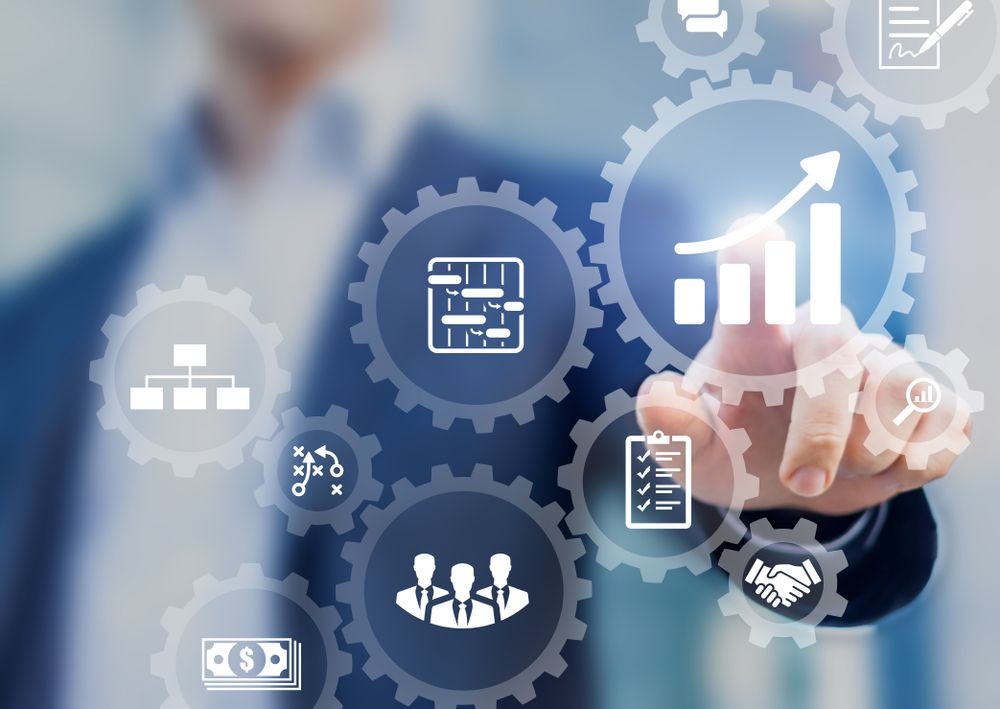

In [2]:
from IPython.display import Image
Image(filename='/Users/adityaanandraogaikwad/Desktop/CLASS DATA/MY PROJECTS/ML Final Project/Hr Analysis and Prediction/Hr.jpg',width=800,height=500)

Human Resource (HR) analytics plays a critical role in managing an organization's workforce effectively. In this project we aim to leverage machine learning techniques to analyze HR data, make insightful predictions, and present findings using intuitive visualizations.
By combining the power of machine learning with HR analytics, the project addresses challenges like employee turnover, performance evaluation, and workforce planning. It helps organizations transition from reactive HR strategies to proactive, data-informed approaches.

- Descriptive analytics to understand employee behaviors and key workforce metrics.
- Predictive models to forecast attrition, satisfaction, and performance.
- Visual dashboards showcasing trends, predictions, and actionable insights.

The ultimate goal of this project is to empower HR professionals with actionable insights, enhance employee satisfaction, and optimize organizational resources through technology. This project demonstrates the intersection of machine learning, human resources, and visualization tools to revolutionize decision-making in modern organizations.

In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/CLASS DATA/MACHINE LEARNING/Project/HR Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Checked how many unique categories are there in a column
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('------------------------------------')
    print('------------------------------------')

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
------------------------------------
------------------------------------
Attrition
['Yes' 'No']
------------------------------------
------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
------------------------------------
------------------------------------
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280 

In [10]:
# It will give count of unique categories
for i in data.columns:
    print(i)
    print(data[i].nunique())
    print('------------------------------------')
    print('------------------------------------')

Age
43
------------------------------------
------------------------------------
Attrition
2
------------------------------------
------------------------------------
BusinessTravel
3
------------------------------------
------------------------------------
DailyRate
886
------------------------------------
------------------------------------
Department
3
------------------------------------
------------------------------------
DistanceFromHome
29
------------------------------------
------------------------------------
Education
5
------------------------------------
------------------------------------
EducationField
6
------------------------------------
------------------------------------
EmployeeCount
1
------------------------------------
------------------------------------
EmployeeNumber
1470
------------------------------------
------------------------------------
EnvironmentSatisfaction
4
------------------------------------
------------------------------------
Gender
2
---

In [11]:
data['EmployeeCount'].value_counts() #checked the value count of the employees

EmployeeCount
1    1470
Name: count, dtype: int64

In [12]:
data['StandardHours'].value_counts()    

StandardHours
80    1470
Name: count, dtype: int64

In [13]:
data['Over18'].value_counts()    # checked value counts of the employees who over 18 years

Over18
Y    1470
Name: count, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
# The mentioned columns are not sofar  important for analysis so we are removing them from the dataset
data.drop(['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','Over18','StandardHours'],axis=1,inplace=True)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


In [16]:
data.info() # we removed unwanted columns from the dataset so now we have total 28 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

# Analysis and visualization

## 1. Attrition Analysis

In [19]:
data['Attrition'].value_counts()  # checked the value count of the employees who are not happy with their jobs

Attrition
No     1233
Yes     237
Name: count, dtype: int64

### Total number of employees in organization is 1470 apart from 237 employees will left their jobs and 1233 employees are happy with their job

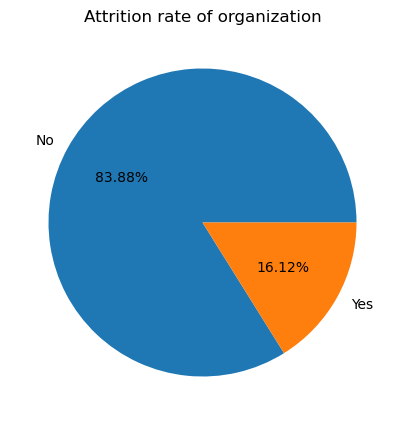

In [21]:
plt.figure(figsize=(5,5))
plt.title('Attrition rate of organization')
plt.pie(data['Attrition'].value_counts(),autopct='%0.2f%%',labels=['No','Yes'])
plt.show()

### The attrition rate of the organization is 16.12 %

## 2. Gender Analysis

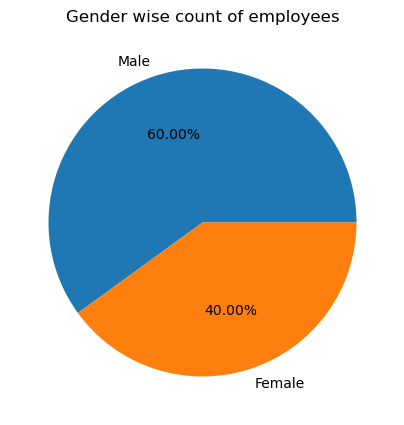

Gender
Male      882
Female    588
Name: count, dtype: int64

In [24]:
plt.figure(figsize=(5,5))
plt.pie(data['Gender'].value_counts(),autopct='%0.2f%%',labels=['Male','Female'])
plt.title('Gender wise count of employees')
plt.show()
data['Gender'].value_counts()

### So there are 60 % Male and 40 % Female Employees in the organiszation

## 3. Age Distribution 

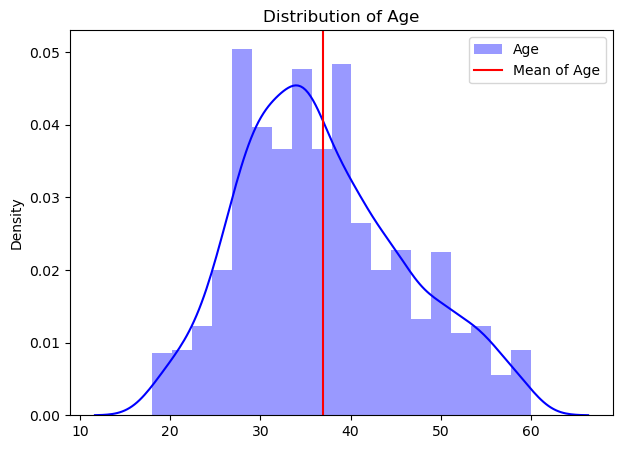

In [27]:
plt.figure(figsize=(7,5))
sns.distplot(x=data['Age'],color='Blue',label='Age')
plt.axvline(x=data['Age'].mean(),color='Red',label='Mean of Age')
plt.title('Distribution of Age')
plt.legend()
plt.show()

## 4. Attrition Analysis with Age

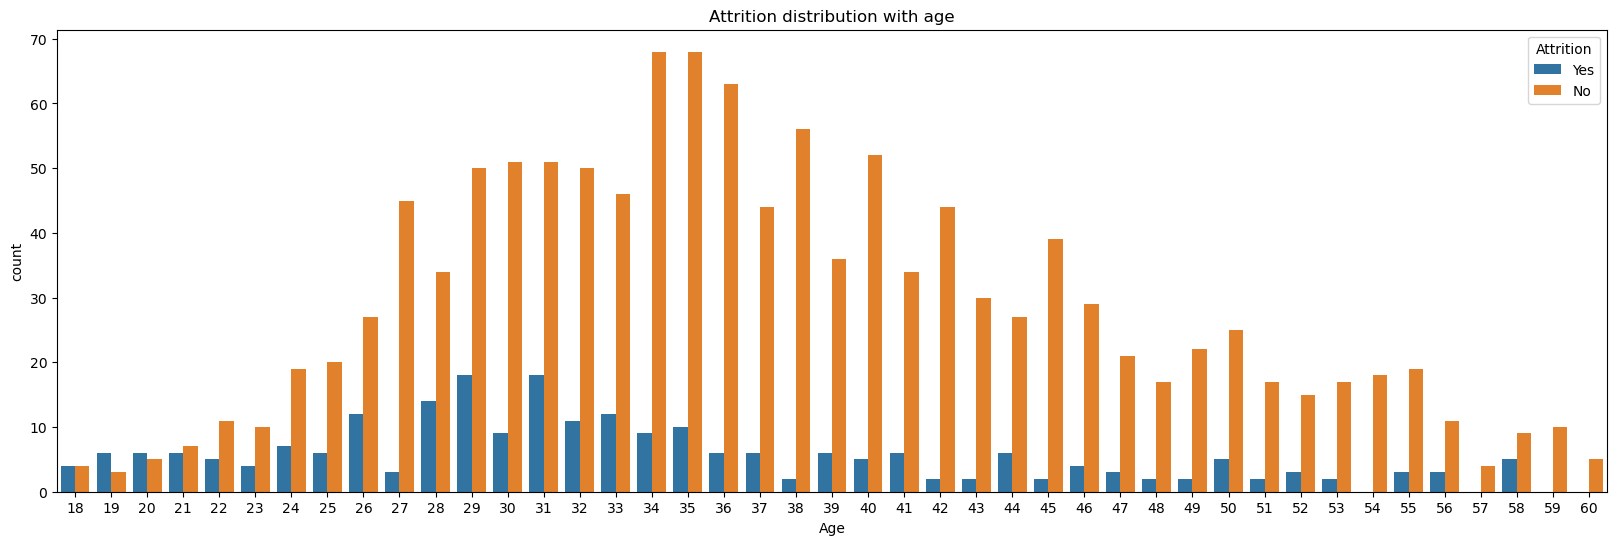

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(data=data, x='Age',hue='Attrition')
plt.title('Attrition distribution with age')
plt.show()

##### From above two graphs we can see that most of the employees are from age group of 26 to 46
##### While average of employee is 37
##### While most of the employees are tends to leave the organization in their early stage of career

## 5. Salary Distribution

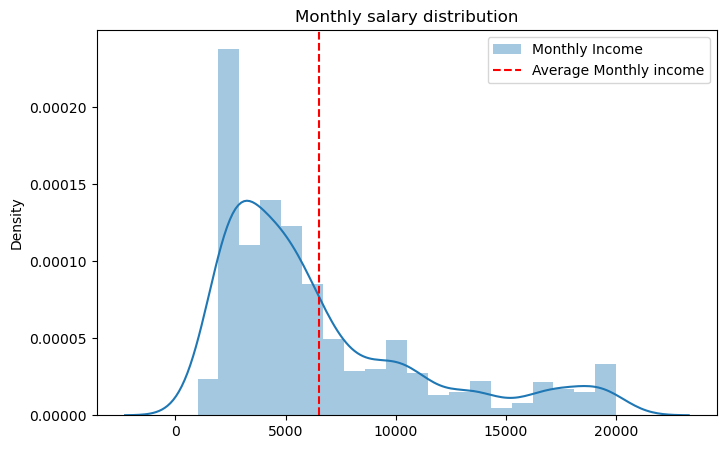

Average Salary of Employees


6502.931292517007

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(x=data['MonthlyIncome'],label='Monthly Income')
plt.axvline(x=data['MonthlyIncome'].mean(),color='Red',linestyle='--',label='Average Monthly income')
plt.title('Monthly salary distribution')
plt.legend()
plt.show()

print('Average Salary of Employees')
data['MonthlyIncome'].mean()

#### Salary distribution shows us that the average salary is around 6500 and most of the employees are from 2500 to 5000 salary range

## 6. Department Analysis

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

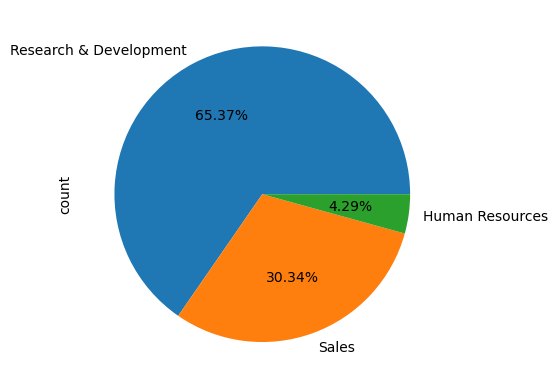

In [35]:
data['Department'].value_counts().plot(kind='pie',autopct='%0.2f%%')
data['Department'].value_counts()

### From above chart we can see the total count and pecentage of deparments employees 

## 7. Department Analysis with Gender

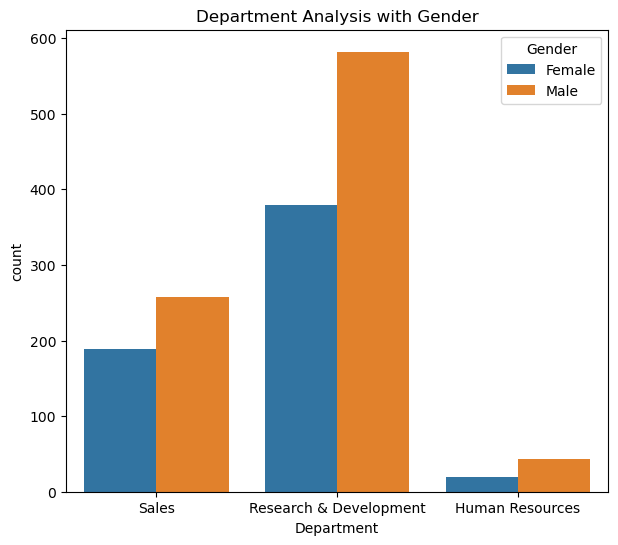

In [38]:
plt.figure(figsize=(7,6))
sns.countplot(x='Department',hue='Gender',data=data)
plt.title('Department Analysis with Gender')
plt.show()

### From above countplot we can see the count of male and female employee from each department

## 8. Department wise business travel analysis

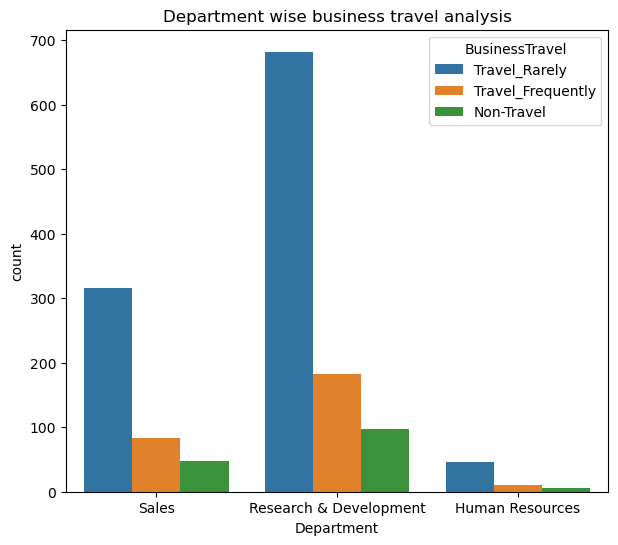

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [41]:
plt.figure(figsize=(7,6))
sns.countplot(x='Department',hue='BusinessTravel',data=data)
plt.title('Department wise business travel analysis')
plt.show()
data['BusinessTravel'].value_counts()

### From above chart we can see the number of traveling employee from each department

## 9. Business Travel with attrition

In [44]:
len(data.loc[(data['Attrition']=='Yes') & (data['BusinessTravel']=='Travel_Rarely')])

156

In [45]:
len(data.loc[(data['Attrition']=='Yes') & (data['BusinessTravel']=='Travel_Frequently')])

69

In [46]:
len(data.loc[(data['Attrition']=='Yes') & (data['BusinessTravel']=='Non-Travel')])

12

In [47]:
len(data.loc[(data['Attrition']=='Yes')])

237

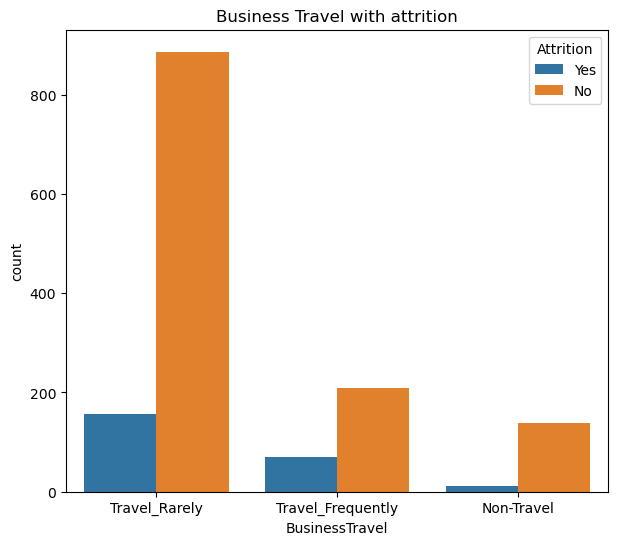

In [48]:
plt.figure(figsize=(7,6))
sns.countplot(x=data['BusinessTravel'],hue=data['Attrition'])
plt.title('Business Travel with attrition')
plt.show()

### Apart from 237 attrited employees 156 employees were traveled rarely, 69 employees were travelling frequently and 12 employees were from non-travel class

### which indicates that there is no trend between employee travel and attrition

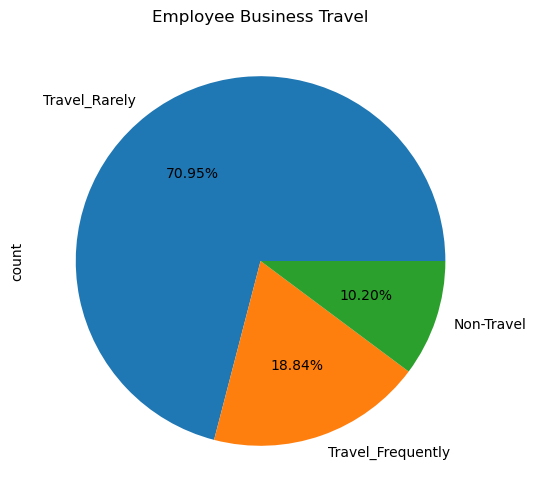

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [50]:
plt.figure(figsize=(7,6))
data['BusinessTravel'].value_counts().plot(kind='pie',autopct=f'%0.2f%%')
plt.title('Employee Business Travel')
plt.show()
data['BusinessTravel'].value_counts()

## 10. Education Field Analysis

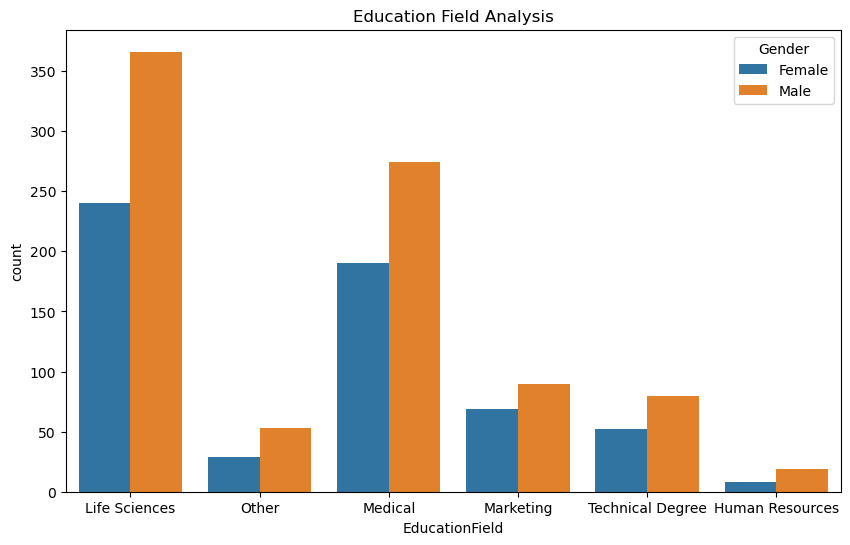

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['EducationField'],hue=data['Gender'])
plt.title('Education Field Analysis')
plt.show()

In [53]:
data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

### Above graph represents educational background of male and female employees within the organization

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

## 11.Distance Analysis

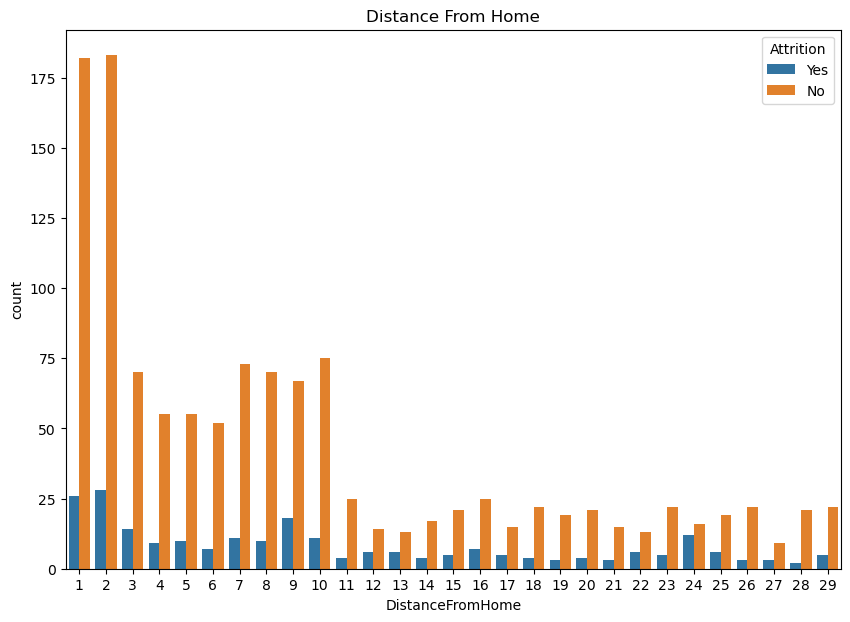

Average distance of employee from their home


9.19251700680272

In [57]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['DistanceFromHome'],hue=data['Attrition'])
plt.title('Distance From Home')
plt.show()
print("Average distance of employee from their home")
data['DistanceFromHome'].mean()

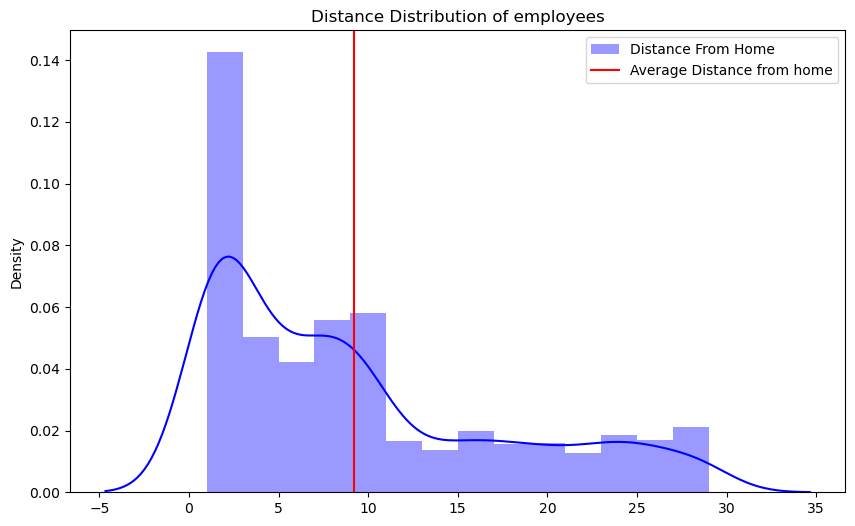

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(x=data['DistanceFromHome'],color='Blue',label='Distance From Home')
plt.axvline(x=data['DistanceFromHome'].mean(),color='Red',label='Average Distance from home')
plt.title('Distance Distribution of employees')
plt.legend()
plt.show()

<Figure size 700x600 with 0 Axes>

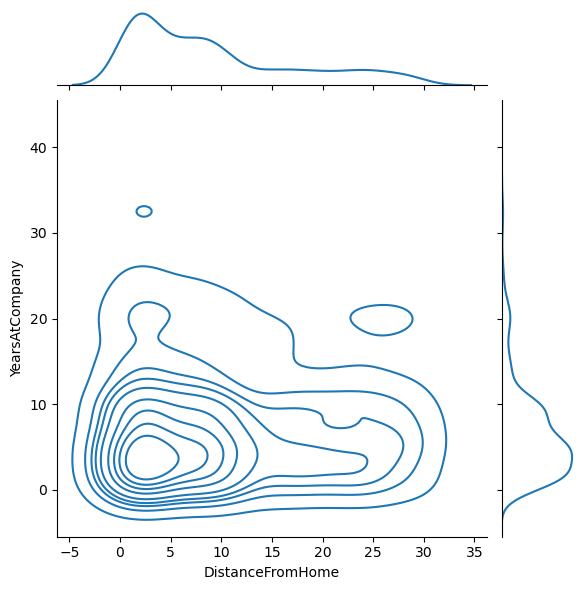

In [59]:
plt.figure(figsize=(7,6))
sns.jointplot(x=data['DistanceFromHome'],y=data['YearsAtCompany'],kind='kde')
plt.show()

#### Above figures shows that average distance between office from is 9.19 km while majority of the employees stays within range of 10 km

#### Also there is a clear trend which shows that employees who lives away from the office are tends to leave the organisation more than those who lives nearby

## 12. Education analysis

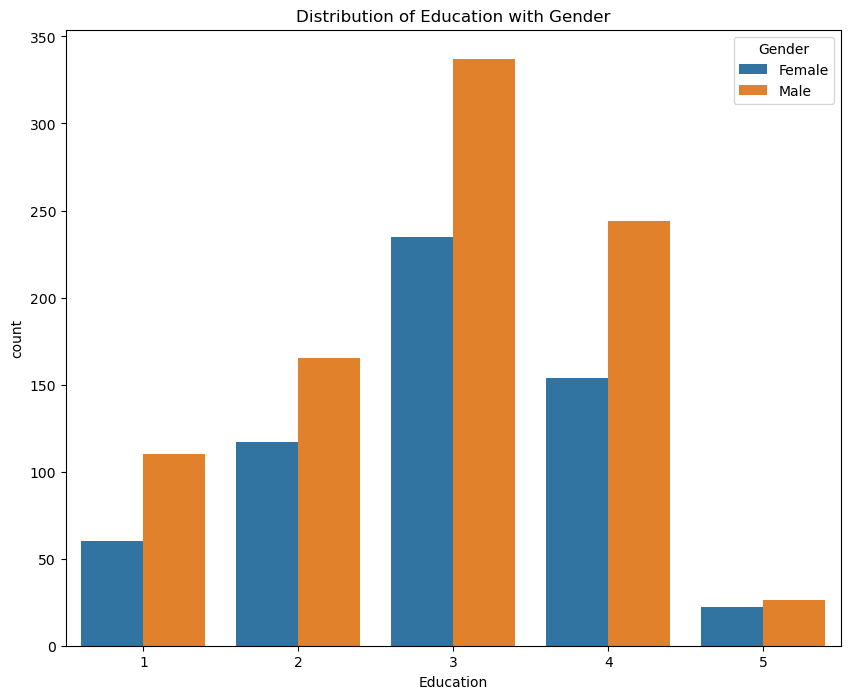

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['Education'],hue=data['Gender'])
plt.title('Distribution of Education with Gender')
plt.show()

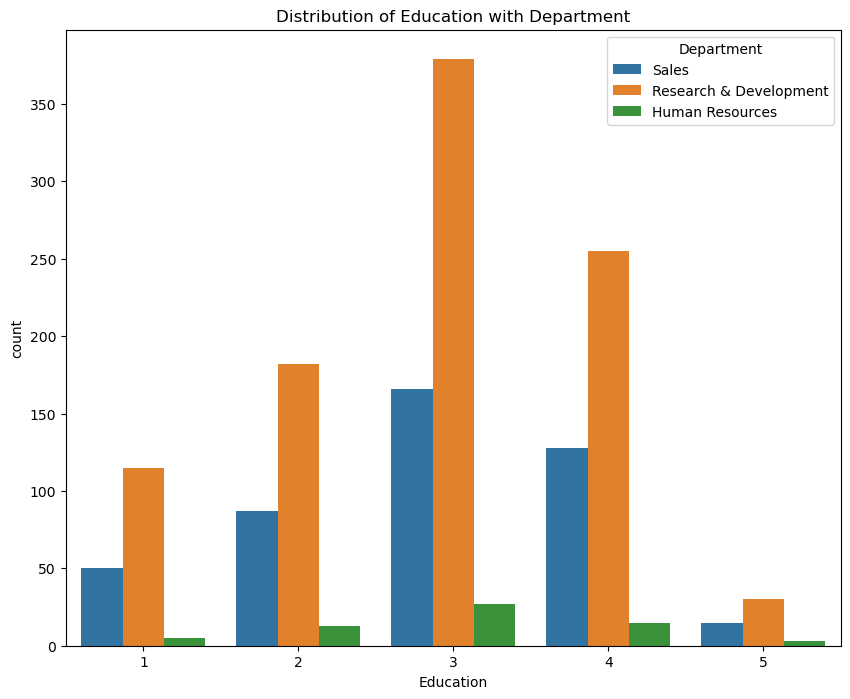

In [63]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['Education'],hue=data['Department'])
plt.title('Distribution of Education with Department')
plt.show()

In [64]:
data['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [65]:
print('Education\n1. Below College\n2. College\n3. Bacholer\n4. Master\n5. Doctor')

Education
1. Below College
2. College
3. Bacholer
4. Master
5. Doctor


## 13. Enviroment Satisfaction Dtstribution with Attrition

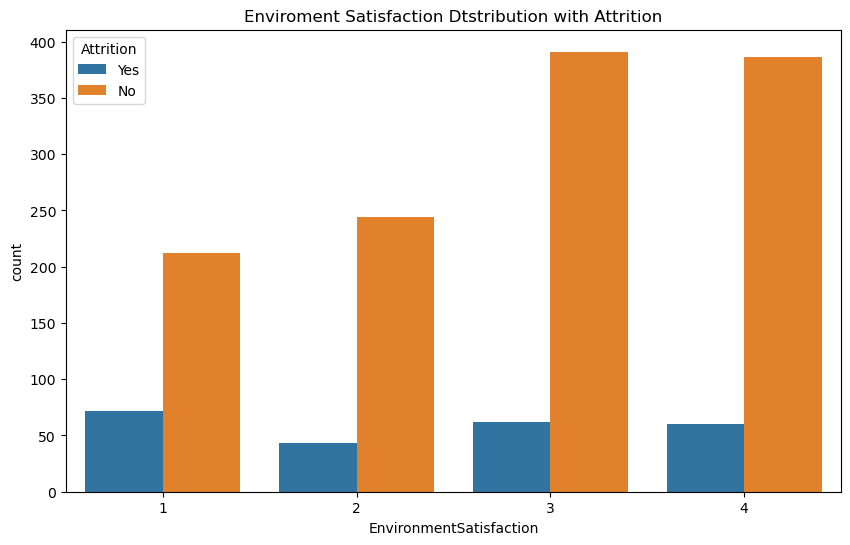

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['EnvironmentSatisfaction'],hue=data['Attrition'])
plt.title('Enviroment Satisfaction Dtstribution with Attrition')
plt.show()

In [68]:
print('EnvironmentSatisfaction\n1. Low\n2. Medium\n3. High\n4. Very High')

EnvironmentSatisfaction
1. Low
2. Medium
3. High
4. Very High


#### Above graph indicates that employee with low environment satisfation have more attrition rate that than othes

## 14. Job Involvment Analysis

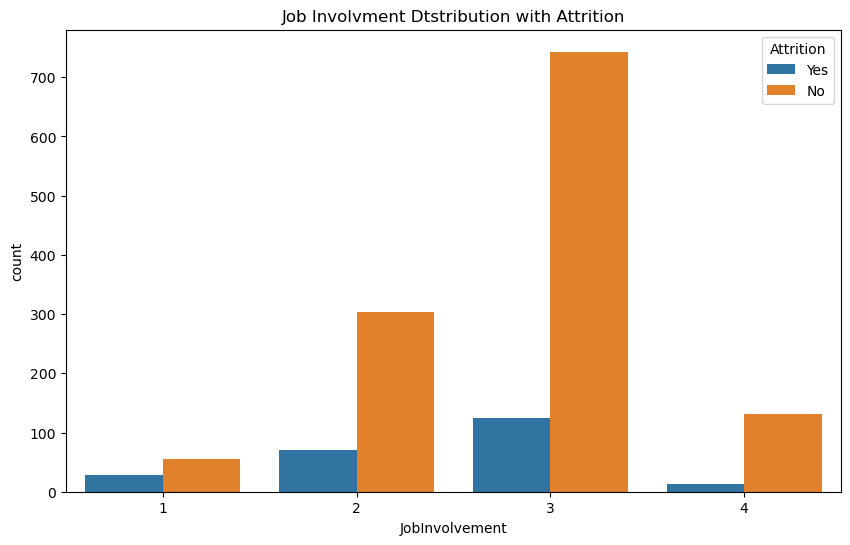

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['JobInvolvement'],hue=data['Attrition'])
plt.title('Job Involvment Dtstribution with Attrition')
plt.show()

In [72]:
print('Job Involvement\n1. Low\n2. Medium\n3. High\n4. Very High')

Job Involvement
1. Low
2. Medium
3. High
4. Very High


## 15. Job Level Analysis 

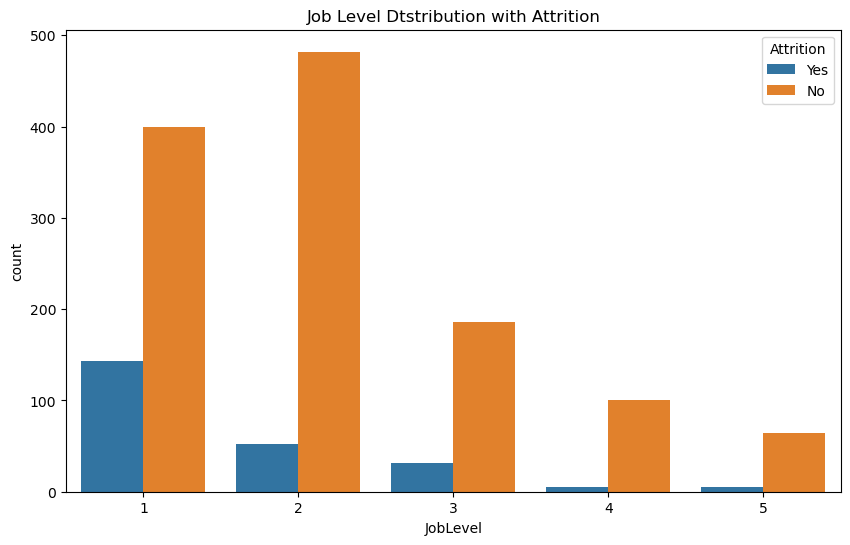

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['JobLevel'],hue=data['Attrition'])
plt.title('Job Level Dtstribution with Attrition')
plt.show()

In [75]:
print('Job Involvement\n1. Low\n2. Medium\n3. High\n4. Very High')

Job Involvement
1. Low
2. Medium
3. High
4. Very High


#### Above graphs shows that employees who are in their early stage of career or have have low job leve are leave more often¶

## 16. Job Role Analysis

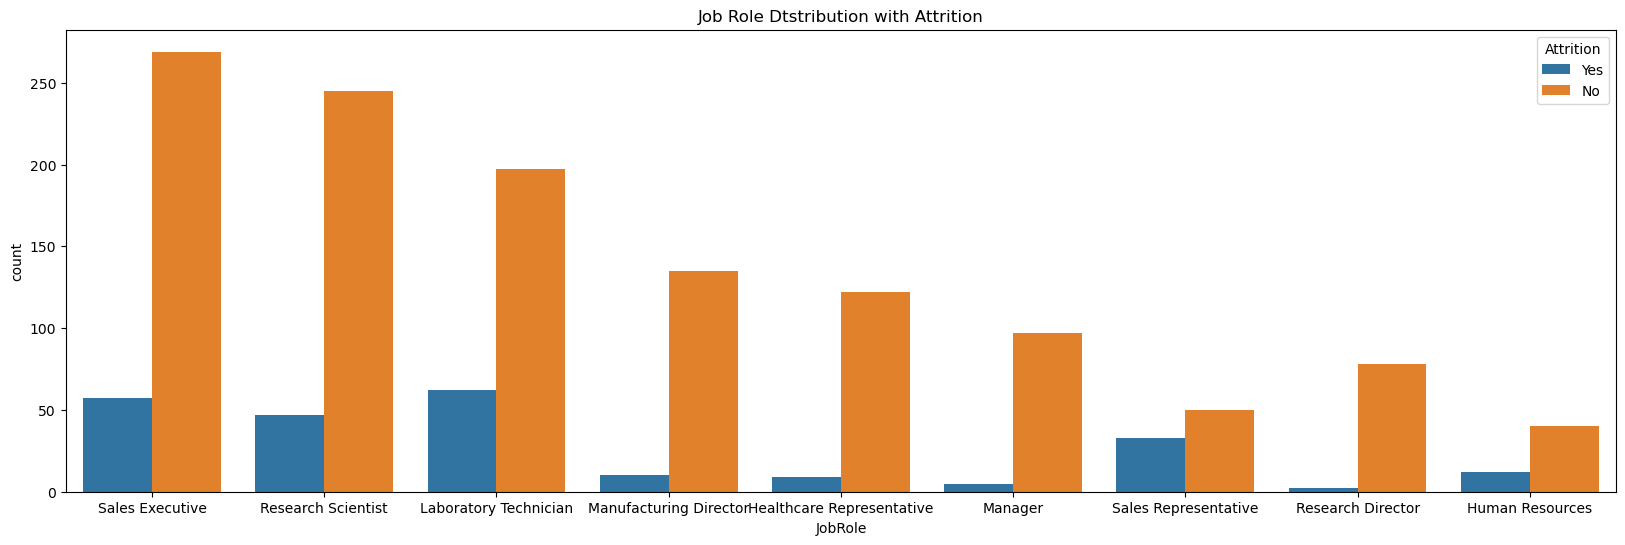

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [78]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['JobRole'],hue=data['Attrition'])
plt.title('Job Role Dtstribution with Attrition')
plt.show()
data['JobRole'].value_counts()

#### Above graphs shows the attrition rate with respect to the job roles and number of employees withing the organization with that role¶

## 17. Job satisfaction

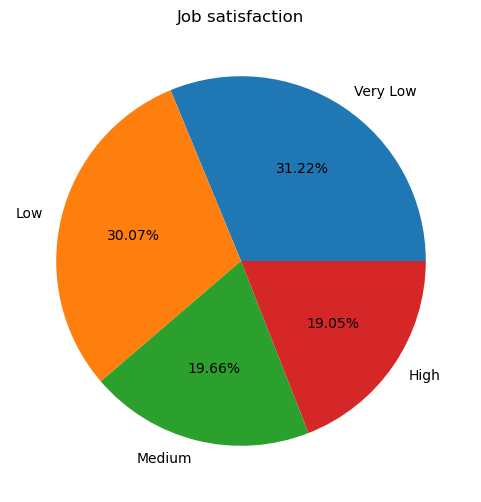

In [81]:
plt.figure(figsize=(7,6))
plt.pie(data['JobSatisfaction'].value_counts(),autopct='%0.2f%%',labels=['Very Low','Low','Medium','High'])
plt.title('Job satisfaction')
plt.show()

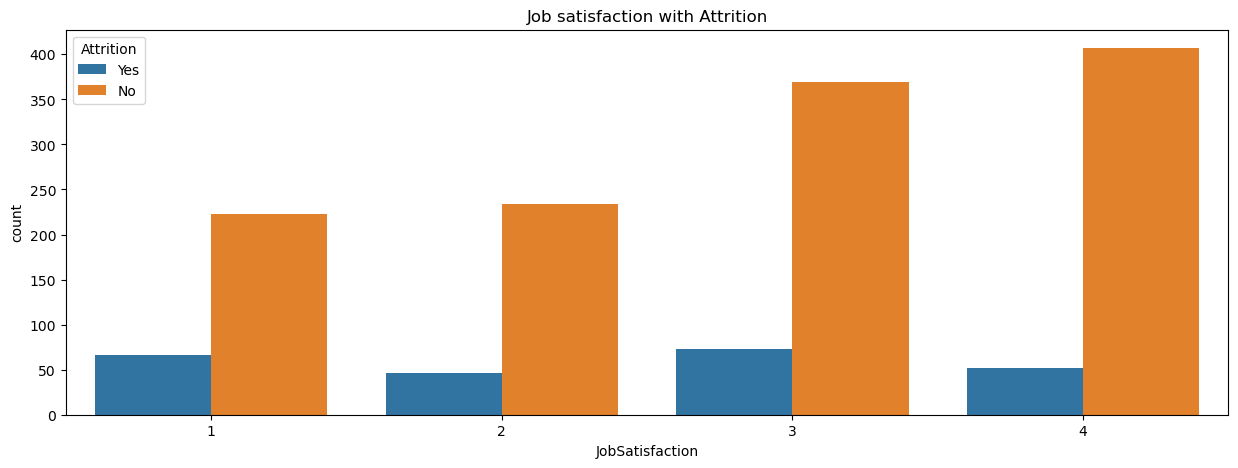

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['JobSatisfaction'],hue=data['Attrition'])
plt.title('Job satisfaction with Attrition')
plt.show()

In [83]:
print("JobSatisfaction\n1 'Low'\n2 'Medium'\n3 'High'\n4 'Very High'")

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'


#### Above graph indicates that employee with high job satisfation have more attrition rate that than othes¶

## 18. Marital Status Analysis

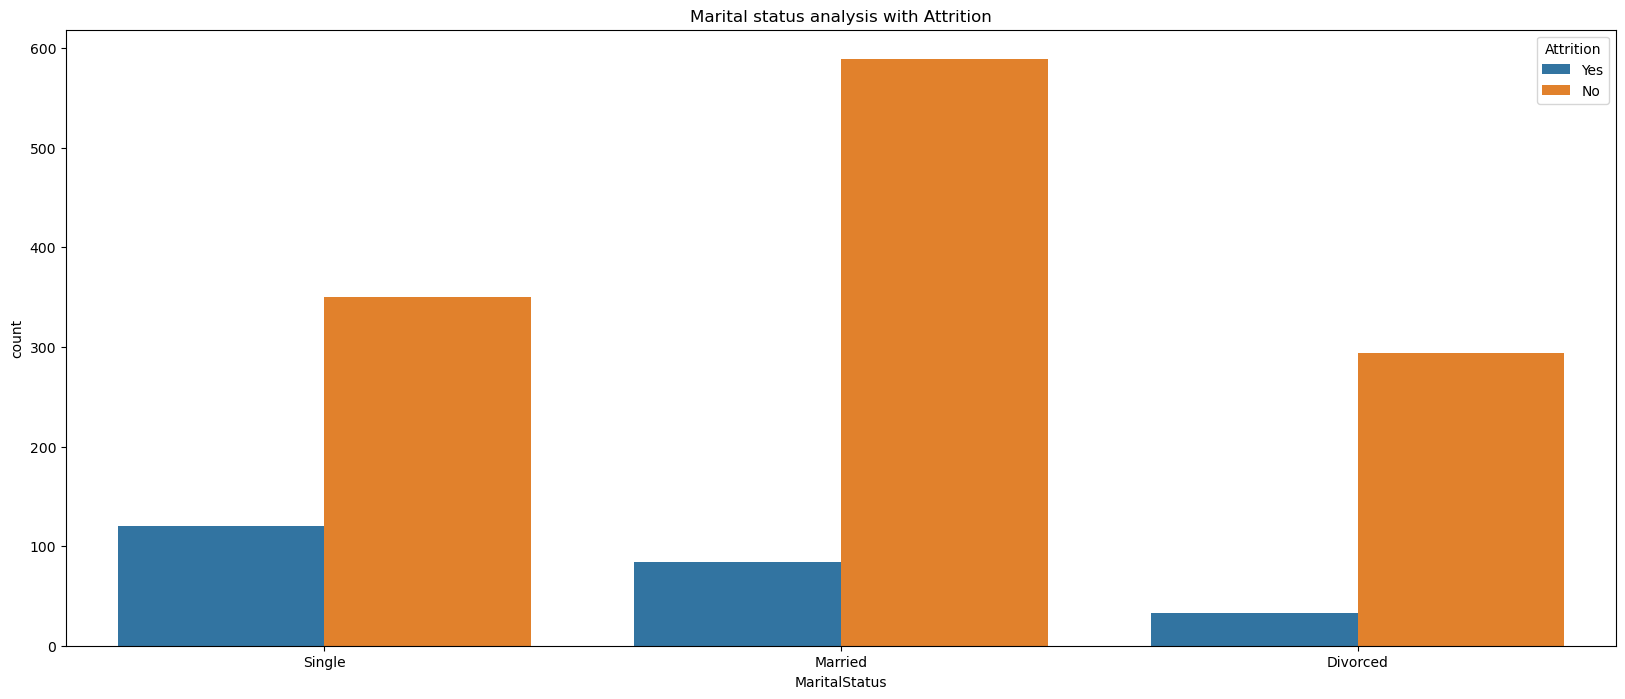

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [86]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['MaritalStatus'],hue=data['Attrition'])
plt.title('Marital status analysis with Attrition')
plt.show()
data['MaritalStatus'].value_counts()

#### Above graph shows us that single employee have more attrition rate than of the married and divorced¶

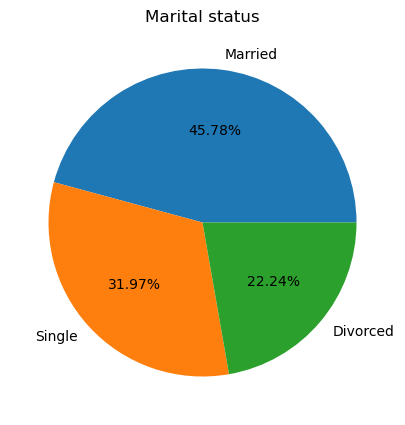

In [88]:
plt.figure(figsize=(6,5))
plt.pie(data['MaritalStatus'].value_counts(),autopct='%0.2f%%',labels =['Married','Single','Divorced'])
plt.title('Marital status')
plt.show()

## 19. Experience Analysis

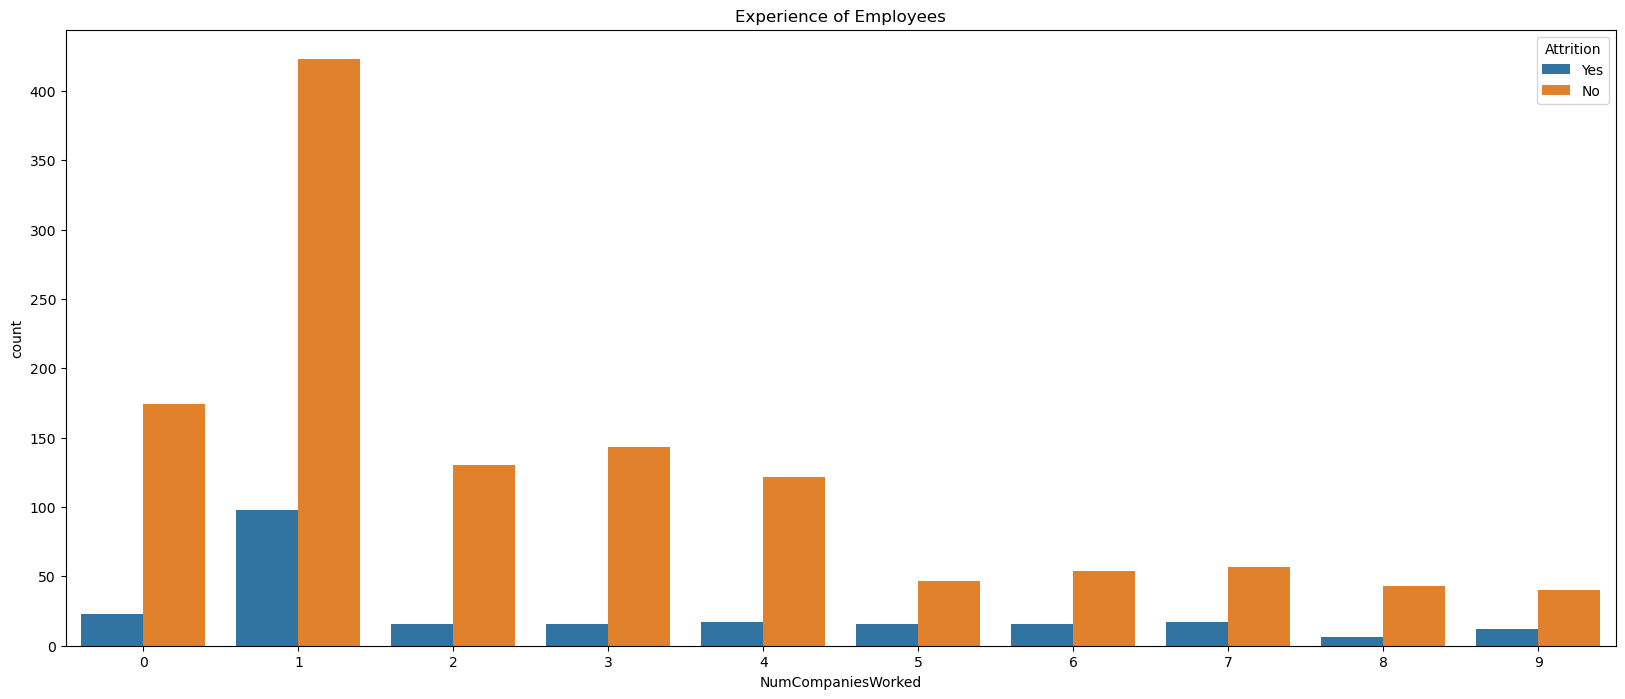

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [90]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['NumCompaniesWorked'],hue=data['Attrition'])
plt.title('Experience of Employees')
plt.show()
data['NumCompaniesWorked'].value_counts()

#### The employee worked in one company has higher attrition rate than the other employees

## 20. Over Time

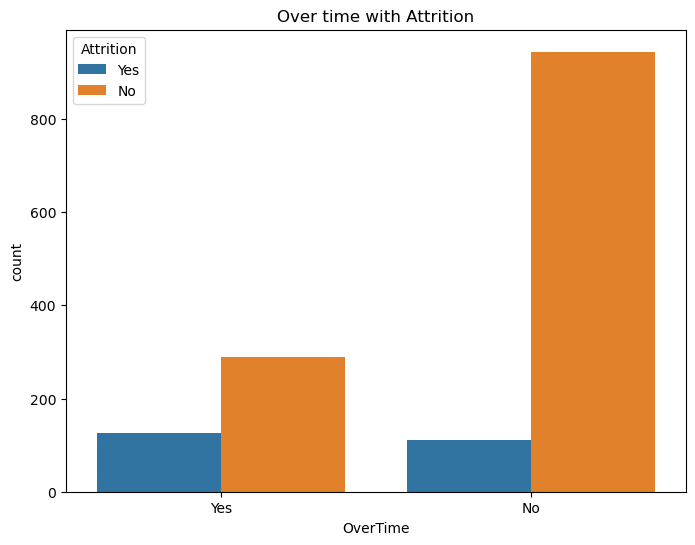

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [93]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['OverTime'],hue=data['Attrition'])
plt.title('Over time with Attrition')
plt.show()
data['OverTime'].value_counts()

In [94]:
len(data.loc[(data['Attrition']=='Yes') & (data['OverTime']=='Yes')])

127

#### The employee who do over time has more attrition rate and there are 127 employees

## 21. WorkLifeBalance Analysis

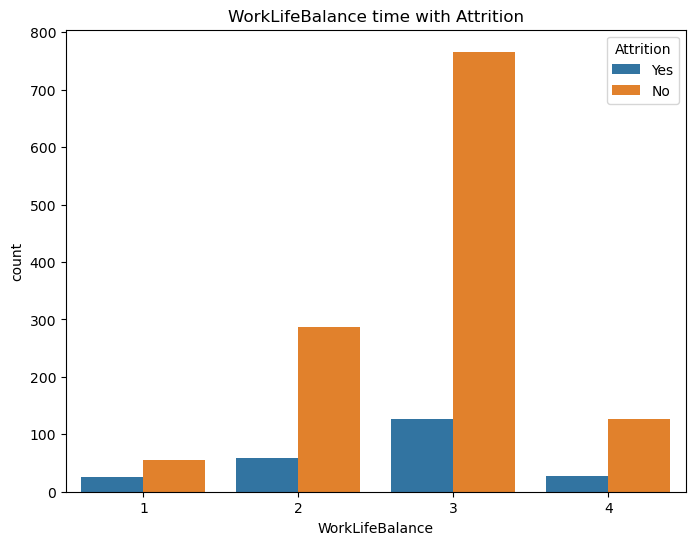

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [97]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['WorkLifeBalance'],hue=data['Attrition'])
plt.title('WorkLifeBalance time with Attrition')
plt.show()
data['WorkLifeBalance'].value_counts()

In [98]:
print("WorkLifeBalance\n1 'Low'\n2 'Medium'\n3 'High'\n4 'Very High'")

WorkLifeBalance
1 'Low'
2 'Medium'
3 'High'
4 'Very High'


In [99]:
print('The employees who has medium worklife balance are: ')
len(data.loc[(data['Attrition']=='Yes') & (data['WorkLifeBalance']== 2)]) 

The employees who has medium worklife balance are: 


58

In [100]:
print('The employees who has high worklife balance are: ')
len(data.loc[(data['Attrition']=='Yes') & (data['WorkLifeBalance']== 3)])

The employees who has high worklife balance are: 


127

#### The employee who have medium and high worklife balance have more attrition rate and 58 employees have medium and 127 employees have high worklife balance.

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

## 22. Salary hike Analysis

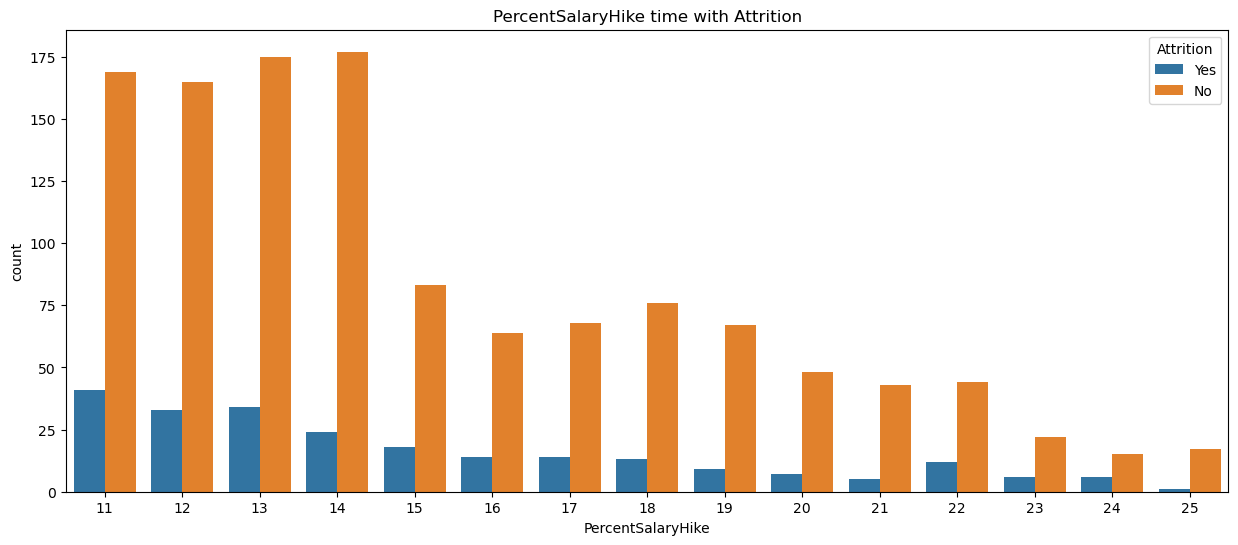

In [104]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['PercentSalaryHike'],hue=data['Attrition'])
plt.title('PercentSalaryHike time with Attrition')
plt.show()

#### From above chart we can see that the less salary hike have more attrition rate

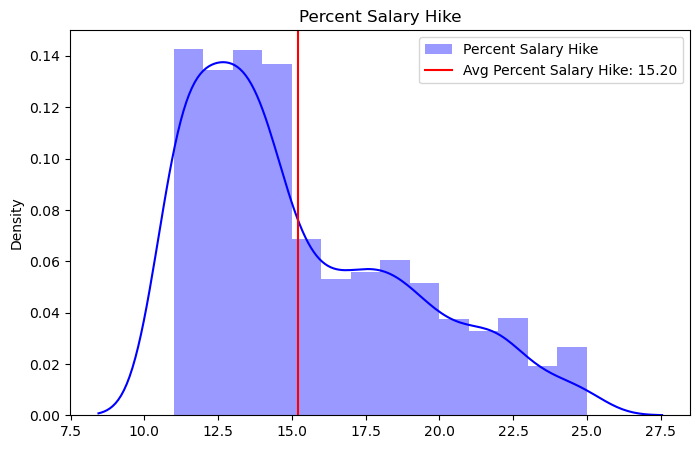

In [106]:
plt.figure(figsize=(8,5))
sns.distplot(x=data['PercentSalaryHike'],color='Blue',label='Percent Salary Hike')
plt.axvline(x=data['PercentSalaryHike'].mean(),color='Red',label='Avg Percent Salary Hike: 15.20')
plt.legend()
plt.title('Percent Salary Hike')
plt.show()

#### Above graph represents us that average salary hike in this organisation is around 15 % while majority of employee gets salary hike between 10% - 15%

## 23. Total Working Years Analysis

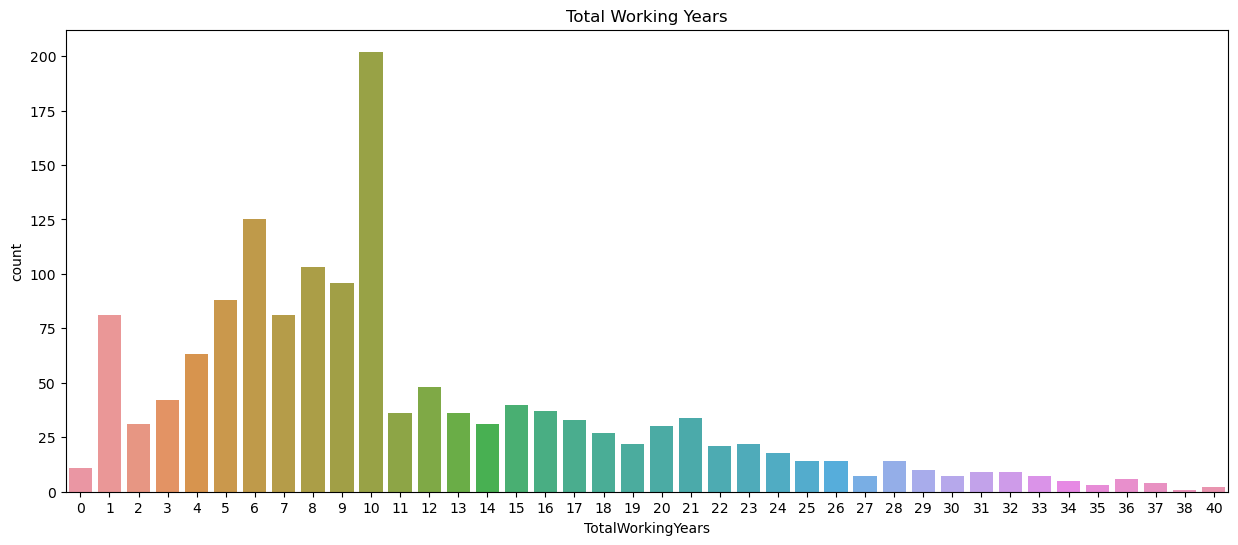

In [109]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['TotalWorkingYears'])
plt.title('Total Working Years')
plt.show()

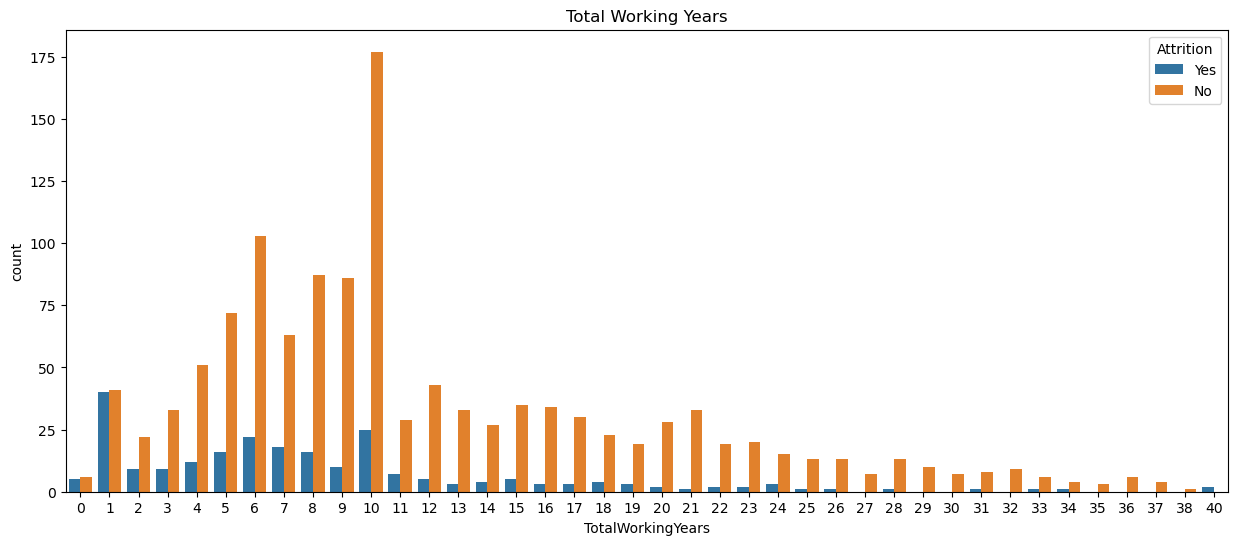

In [110]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['TotalWorkingYears'],hue=data['Attrition'])
plt.title('Total Working Years')
plt.show()

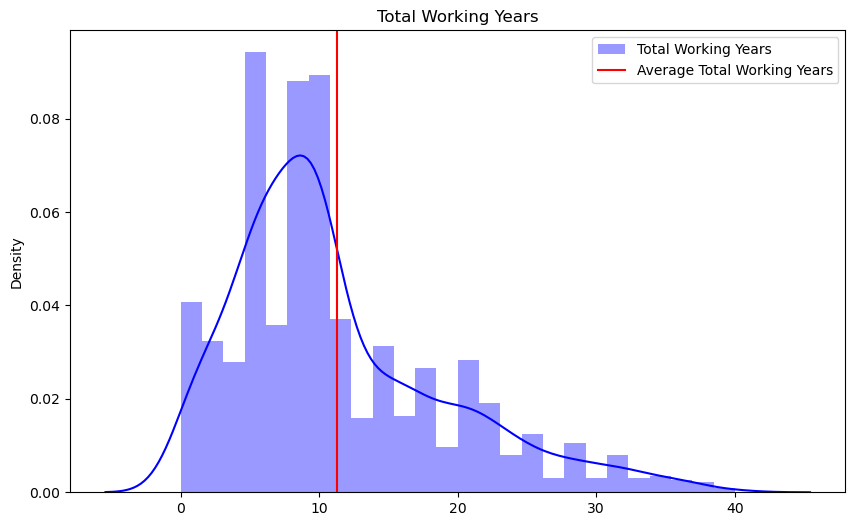

In [111]:
plt.figure(figsize=(10,6))
sns.distplot(x=data['TotalWorkingYears'],color='Blue',label='Total Working Years')
plt.axvline(x=data['TotalWorkingYears'].mean(),color='Red',label='Average Total Working Years')
plt.legend()
plt.title('Total Working Years')
plt.show()

#### Above graphical represents showcase that average working experience of the employee in organization is arount 11 years

## 24. Working Years at Company

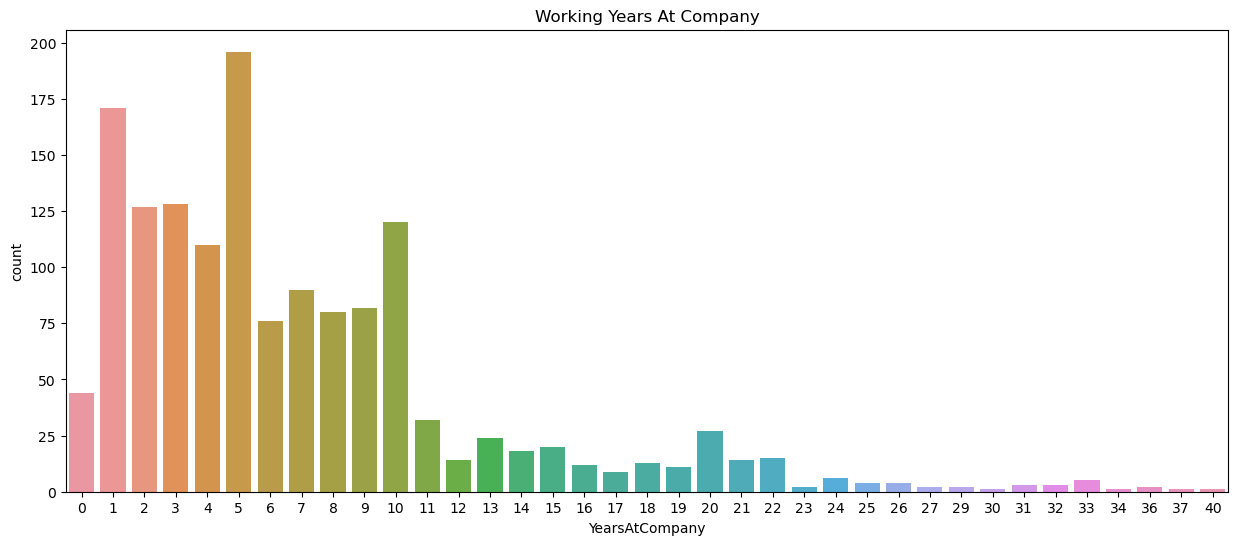

In [114]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['YearsAtCompany'])
plt.title('Working Years At Company')
plt.show()

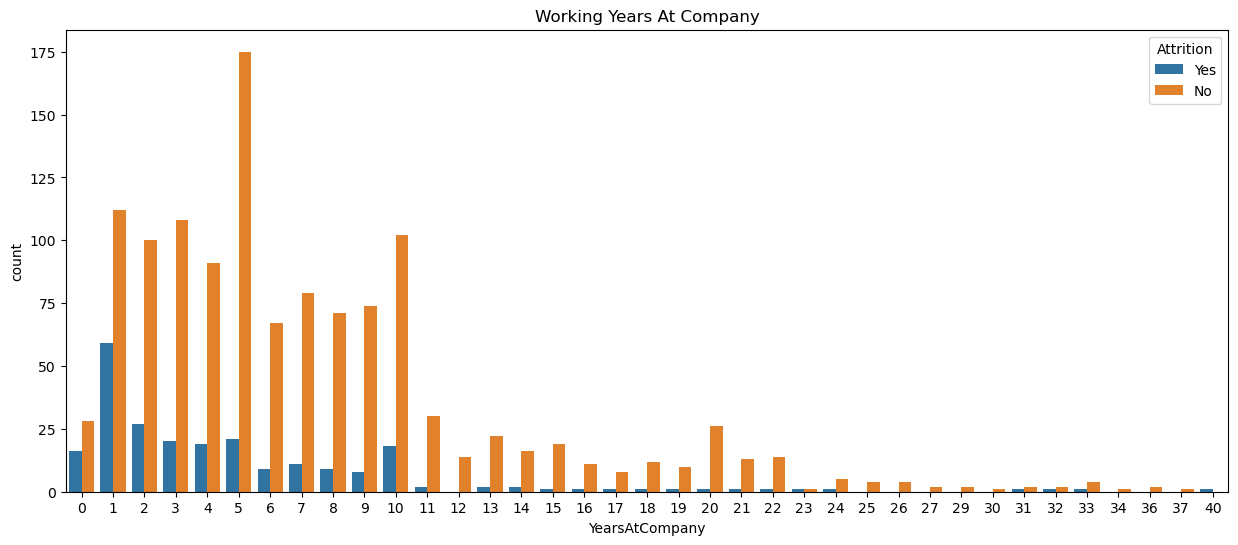

In [115]:
plt.figure(figsize=(15,6))
sns.countplot(x=data['YearsAtCompany'],hue=data['Attrition'])
plt.title('Working Years At Company')
plt.show()

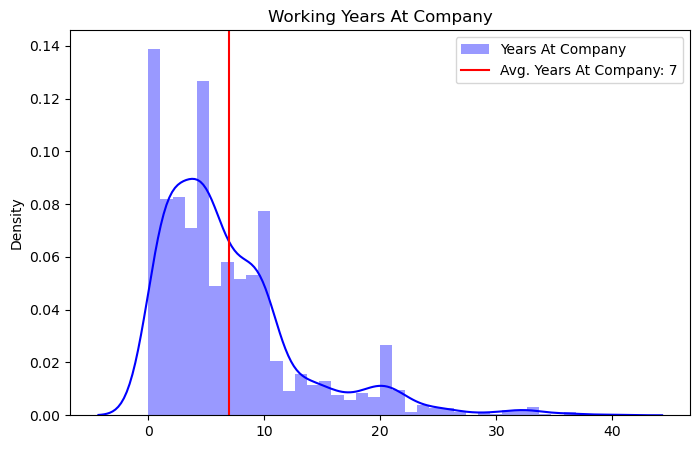

In [116]:
plt.figure(figsize=(8,5))
sns.distplot(x=data['YearsAtCompany'],color='Blue',label='Years At Company')
plt.axvline(x=data['YearsAtCompany'].mean(),color='Red',label='Avg. Years At Company: 7')
plt.legend()
plt.title('Working Years At Company')
plt.show()

#### Above graphs represnts that employee spend average of 7 years at the company

## 25. Working Years In CurrentRole

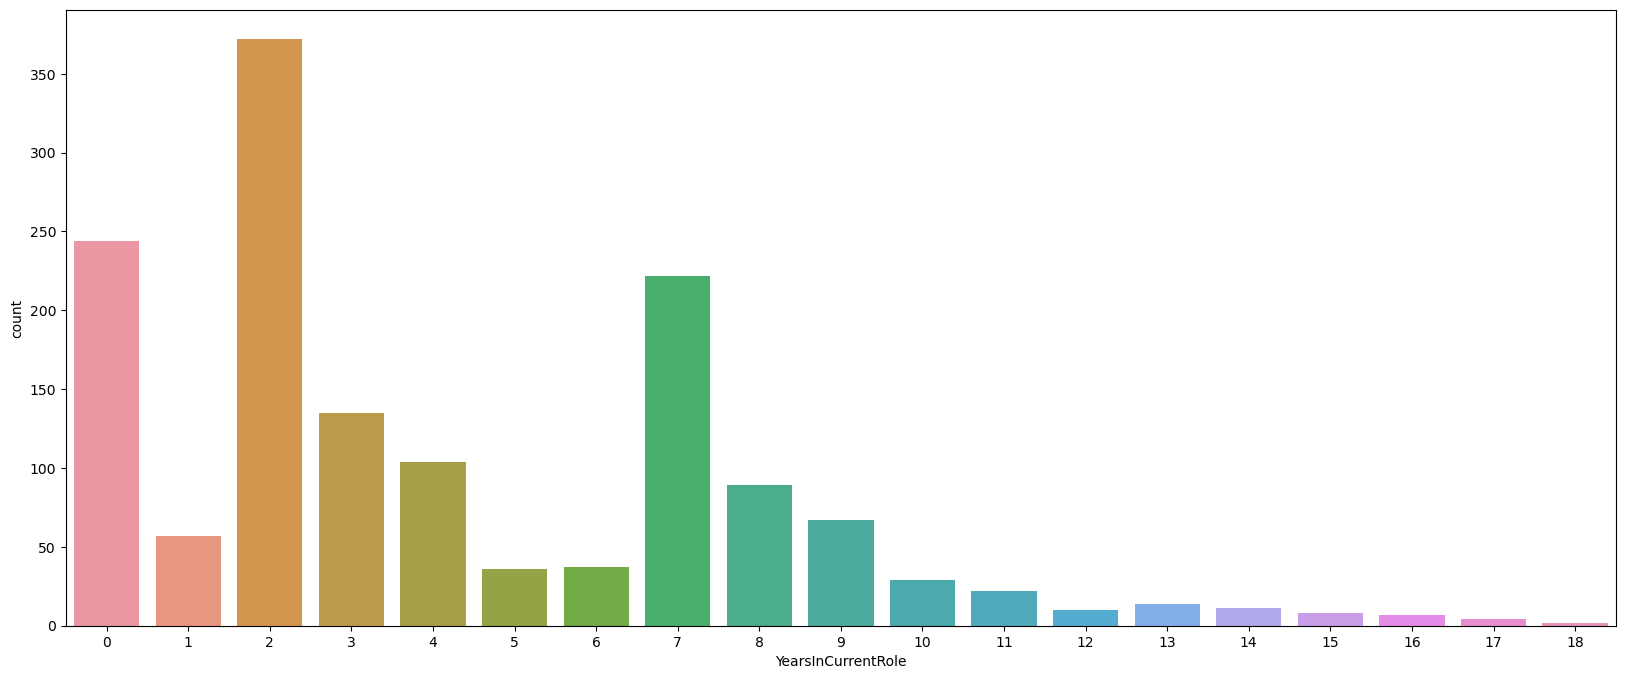

In [119]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['YearsInCurrentRole'])
plt.show()

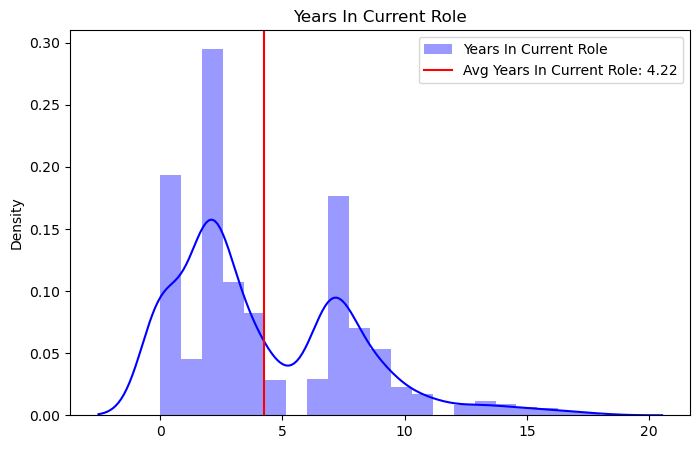

In [120]:
plt.figure(figsize=(8,5))
sns.distplot(x=data['YearsInCurrentRole'],color='Blue',label='Years In Current Role')
plt.axvline(x=data['YearsInCurrentRole'].mean(),color='Red',label='Avg Years In Current Role: 4.22')
plt.legend()
plt.title('Years In Current Role')
plt.show()

## 26. Working Years With Current Manager

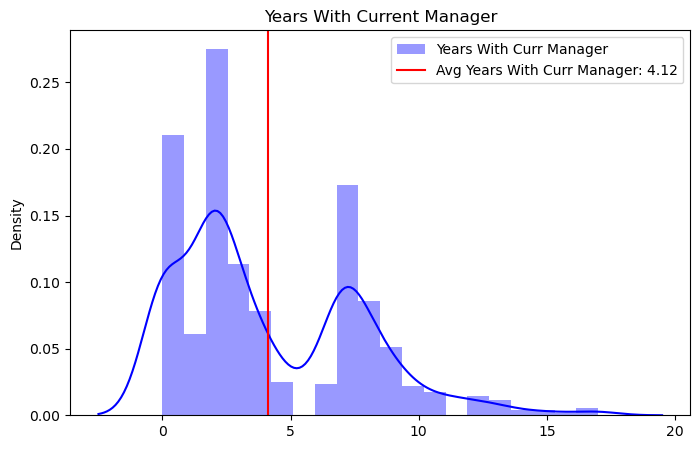

In [122]:
plt.figure(figsize=(8,5))
sns.distplot(x=data['YearsWithCurrManager'],color='Blue',label='Years With Curr Manager')
plt.axvline(x=data['YearsWithCurrManager'].mean(),color='Red',label='Avg Years With Curr Manager: 4.12')
plt.legend()
plt.title('Years With Current Manager')
plt.show()

#### Above graphs shoves that employee spents around 4 years with a single manager

## Data Prepration For ML

In [125]:
cat_columns = data.select_dtypes(object).columns
cat_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [126]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [127]:
data[cat_columns] = oe.fit_transform(data[cat_columns])
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,2.0,1,2,1.0,2,0.0,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,1.0,8,1,1.0,3,1.0,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1.0,2,2,4.0,4,1.0,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1.0,3,4,1.0,4,0.0,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,1.0,2,1,3.0,1,1.0,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,1.0,23,2,3.0,3,1.0,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,1.0,6,1,3.0,4,1.0,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,1.0,4,3,1.0,2,1.0,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,2.0,2,3,3.0,4,1.0,2,...,3,4,0,17,3,2,9,6,0,8


In [128]:
features = data.iloc[:,2:]
features['Age'] = data.iloc[:,:1]
target = data.iloc[:,1]

In [129]:
features

,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age
0,2.0,2.0,1,2,1.0,2,0.0,3,2,7.0,...,1,0,8,0,1,6,4,0,5,41
1,1.0,1.0,8,1,1.0,3,1.0,2,2,6.0,...,4,1,10,3,3,10,7,1,7,49
2,2.0,1.0,2,2,4.0,4,1.0,2,1,2.0,...,2,0,7,3,3,0,0,0,0,37
3,1.0,1.0,3,4,1.0,4,0.0,3,1,6.0,...,3,0,8,3,3,8,7,3,0,33
4,2.0,1.0,2,1,3.0,1,1.0,3,1,2.0,...,4,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,1.0,23,2,3.0,3,1.0,4,2,2.0,...,3,1,17,3,3,5,2,0,3,36
1466,2.0,1.0,6,1,3.0,4,1.0,2,3,0.0,...,1,1,9,5,3,7,7,1,7,39
1467,2.0,1.0,4,3,1.0,2,1.0,4,2,4.0,...,2,1,6,0,3,6,2,0,3,27
1468,1.0,2.0,2,3,3.0,4,1.0,2,2,7.0,...,4,0,17,3,2,9,6,0,8,49


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [131]:
from sklearn.svm import SVC
svm = SVC()

In [132]:
from sklearn.metrics import classification_report,accuracy_score

In [133]:
cr = classification_report
ac = accuracy_score

In [134]:
svm.fit(x_train,y_train)
y_pred= svm.predict(x_test)
print(classification_report(y_test,y_pred))
ac(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       255
         1.0       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



0.8673469387755102

In [135]:
svm = SVC(kernel='linear',C=0.1,gamma=1)

In [136]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))
ac(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       255
         1.0       0.67      0.21      0.31        39

    accuracy                           0.88       294
   macro avg       0.78      0.59      0.62       294
weighted avg       0.86      0.88      0.85       294



0.8809523809523809

In [137]:
svm.score(x_train,y_train)

0.8767006802721088

## Prediction

In [139]:
def predict():
    a1=int(input('Enter Your Age: ')) 
    a2=eval(input('Enter your travel class no:'))
    a3=eval(input('Enter your Department no:'))
    a4=eval(input('Enter Distance From Home to office:'))
    a5=eval(input('Enter your Education level:'))
    a6=eval(input('Enter your education field no:'))
    a7=eval(input('Enter environment satisfation level:'))
    a8=eval(input('Enter your gender 0 for femal & 1 for male: '))
    a9=eval(input('Enter Job Involvement level:'))
    a10=eval(input('Enter Job level:'))
    a11=eval(input('Enter Job Role no :'))
    a12=eval(input('Enter Job Satisfaction level:'))
    a13=eval(input('Enter maritial status :'))
    a14=eval(input('Enter Monthly Income:'))
    a15=eval(input('no of companies worked before:'))
    a16=eval(input('enter 0 for no overtime 1 for overtime :'))
    a17=eval(input('Enter percentage salary hike:'))
    a18=eval(input('employee performance rating:'))
    a19=eval(input('relationship satisfaction level:'))
    a20=eval(input('stock option level:'))
    a21=eval(input('years of work experience:'))
    a22=eval(input('training times last year:'))
    a23=eval(input('level of work life balance: '))
    a24=eval(input('years spent at this company:'))
    a25=eval(input('years in current role:'))
    a26=eval(input('years since last promotion:'))
    a27=eval(input('years with current manager:'))
    
    newob=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27]

    ans = svm.predict([newob])[0]

    if ans==1:
        print('\nEmployee will leave the company')
    else:
        print('\nEmployee will stay')
        return ans

In [ ]:
predict()